In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fields = pd.read_csv('fields.csv',
                     names=['DOI', 'field'])

In [5]:
fields.head()

,DOI,field
0,10.1163/1568525043083505,Humanities
1,10.1163/1568525043083532,Humanities
2,10.1163/1568525043083541,Humanities
3,10.1163/1568525043083514,Humanities
4,10.1163/1568527053083412,Humanities


In [2]:
texts = pd.read_csv('prepr_texts_v2.tsv', sep='\t',
                    names=['DOI', 'prepr_title', 'prepr_abstract'])

In [3]:
texts.head()

,DOI,prepr_title,prepr_abstract
0,10.1163/1568525043083505,aristotle fr. 44 rose: midas and silenus,scholars have identified two supposedly separa...
1,10.1163/1568525043083532,loca loquuntur. lucretius' explanation of the ...,a discussion of the second part of lucretius' ...
2,10.1163/1568525043083541,poverty and demography: the case of the gracch...,according to many ancient historians the secon...
3,10.1163/1568525043083514,old persian in athens revisited (ar. ach. 100),the old persian line in aristophanes' acharnia...
4,10.1163/1568527053083412,religion and violence: what can sociology offer?,this essay presents a sketch of a sociological...


In [6]:
df = pd.merge(fields, texts, on='DOI')

In [7]:
df.head()

,DOI,field,prepr_title,prepr_abstract
0,10.1163/1568525043083505,Humanities,aristotle fr. 44 rose: midas and silenus,scholars have identified two supposedly separa...
1,10.1163/1568525043083532,Humanities,loca loquuntur. lucretius' explanation of the ...,a discussion of the second part of lucretius' ...
2,10.1163/1568525043083541,Humanities,poverty and demography: the case of the gracch...,according to many ancient historians the secon...
3,10.1163/1568525043083514,Humanities,old persian in athens revisited (ar. ach. 100),the old persian line in aristophanes' acharnia...
4,10.1163/1568527053083412,Humanities,religion and violence: what can sociology offer?,this essay presents a sketch of a sociological...


In [8]:
df.to_csv('prepr_abstract_field.csv')

In [6]:
df = pd.read_csv('prepr_abstract_field_GM_all_1.csv')

In [7]:
df.dropna(inplace=True)

In [5]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import make_pipeline

In [8]:
X = df['prepr_abstract']

In [9]:
from sklearn.model_selection import train_test_split

labels = df['field']
X_train, X_test, y_train, y_test = train_test_split(X, labels, train_size=.5, test_size=.15, random_state=1337, stratify=labels)

In [7]:
vectorizer = HashingVectorizer(ngram_range=(1, 2), stop_words='english')

In [10]:
features = vectorizer.fit_transform(X_train, y_train)

In [9]:
import gc
gc.collect()

217

In [11]:
features.shape

(1064356, 1048576)

In [12]:
type(features)

scipy.sparse.csr.csr_matrix

In [6]:
from scipy.sparse import save_npz

np.save('features_v4.npy', features)

In [2]:
from scipy.sparse import load_npz

features = load_npz('features_v4.npz')

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD


svd = TruncatedSVD(13)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

features = lsa.fit_transform(features)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 3%


In [14]:
from sklearn.cluster import MiniBatchKMeans

km = MiniBatchKMeans(n_clusters=np.unique(labels).shape[0], verbose=True, random_state=1337,
                    batch_size=1000)

In [15]:
km.fit(features)

Init 1/3 with method: k-means++
Inertia for init 1/3: 880.903900
Init 2/3 with method: k-means++
Inertia for init 2/3: 962.985541
Init 3/3 with method: k-means++
Inertia for init 3/3: 843.724448
Minibatch iteration 1/106500: mean batch inertia: 0.275594, ewa inertia: 0.275594 
Minibatch iteration 2/106500: mean batch inertia: 0.277221, ewa inertia: 0.275597 
Minibatch iteration 3/106500: mean batch inertia: 0.272945, ewa inertia: 0.275592 
Minibatch iteration 4/106500: mean batch inertia: 0.273906, ewa inertia: 0.275589 
Minibatch iteration 5/106500: mean batch inertia: 0.273413, ewa inertia: 0.275585 
Minibatch iteration 6/106500: mean batch inertia: 0.282106, ewa inertia: 0.275597 
Minibatch iteration 7/106500: mean batch inertia: 0.279838, ewa inertia: 0.275605 
Minibatch iteration 8/106500: mean batch inertia: 0.266206, ewa inertia: 0.275588 
Minibatch iteration 9/106500: mean batch inertia: 0.268814, ewa inertia: 0.275575 
Minibatch iteration 10/106500: mean batch inertia: 0.26727

Minibatch iteration 103/106500: mean batch inertia: 0.267209, ewa inertia: 0.273627 
Minibatch iteration 104/106500: mean batch inertia: 0.267087, ewa inertia: 0.273615 
Minibatch iteration 105/106500: mean batch inertia: 0.264458, ewa inertia: 0.273597 
Minibatch iteration 106/106500: mean batch inertia: 0.260782, ewa inertia: 0.273573 
Minibatch iteration 107/106500: mean batch inertia: 0.259018, ewa inertia: 0.273546 
Minibatch iteration 108/106500: mean batch inertia: 0.262061, ewa inertia: 0.273524 
Minibatch iteration 109/106500: mean batch inertia: 0.264678, ewa inertia: 0.273508 
Minibatch iteration 110/106500: mean batch inertia: 0.265982, ewa inertia: 0.273494 
Minibatch iteration 111/106500: mean batch inertia: 0.253518, ewa inertia: 0.273456 
Minibatch iteration 112/106500: mean batch inertia: 0.266773, ewa inertia: 0.273443 
Minibatch iteration 113/106500: mean batch inertia: 0.255746, ewa inertia: 0.273410 
Minibatch iteration 114/106500: mean batch inertia: 0.259127, ewa

Minibatch iteration 204/106500: mean batch inertia: 0.259194, ewa inertia: 0.271234 
Minibatch iteration 205/106500: mean batch inertia: 0.252537, ewa inertia: 0.271199 
Minibatch iteration 206/106500: mean batch inertia: 0.259421, ewa inertia: 0.271177 
Minibatch iteration 207/106500: mean batch inertia: 0.260265, ewa inertia: 0.271156 
Minibatch iteration 208/106500: mean batch inertia: 0.258974, ewa inertia: 0.271133 
Minibatch iteration 209/106500: mean batch inertia: 0.258525, ewa inertia: 0.271109 
Minibatch iteration 210/106500: mean batch inertia: 0.259068, ewa inertia: 0.271087 
Minibatch iteration 211/106500: mean batch inertia: 0.263802, ewa inertia: 0.271073 
Minibatch iteration 212/106500: mean batch inertia: 0.255017, ewa inertia: 0.271043 
Minibatch iteration 213/106500: mean batch inertia: 0.257422, ewa inertia: 0.271017 
Minibatch iteration 214/106500: mean batch inertia: 0.254633, ewa inertia: 0.270987 
Minibatch iteration 215/106500: mean batch inertia: 0.254711, ewa

Minibatch iteration 406/106500: mean batch inertia: 0.252295, ewa inertia: 0.267050 
Minibatch iteration 407/106500: mean batch inertia: 0.253713, ewa inertia: 0.267025 
Minibatch iteration 408/106500: mean batch inertia: 0.253752, ewa inertia: 0.267000 
Minibatch iteration 409/106500: mean batch inertia: 0.264729, ewa inertia: 0.266996 
Minibatch iteration 410/106500: mean batch inertia: 0.253779, ewa inertia: 0.266971 
Minibatch iteration 411/106500: mean batch inertia: 0.254303, ewa inertia: 0.266947 
Minibatch iteration 412/106500: mean batch inertia: 0.262427, ewa inertia: 0.266939 
Minibatch iteration 413/106500: mean batch inertia: 0.262929, ewa inertia: 0.266931 
Minibatch iteration 414/106500: mean batch inertia: 0.252664, ewa inertia: 0.266905 
Minibatch iteration 415/106500: mean batch inertia: 0.261401, ewa inertia: 0.266894 
Minibatch iteration 416/106500: mean batch inertia: 0.267114, ewa inertia: 0.266895 
Minibatch iteration 417/106500: mean batch inertia: 0.259671, ewa

Minibatch iteration 522/106500: mean batch inertia: 0.255523, ewa inertia: 0.265513 
Minibatch iteration 523/106500: mean batch inertia: 0.259270, ewa inertia: 0.265501 
Minibatch iteration 524/106500: mean batch inertia: 0.258264, ewa inertia: 0.265488 
Minibatch iteration 525/106500: mean batch inertia: 0.260140, ewa inertia: 0.265478 
Minibatch iteration 526/106500: mean batch inertia: 0.253714, ewa inertia: 0.265456 
Minibatch iteration 527/106500: mean batch inertia: 0.260291, ewa inertia: 0.265446 
Minibatch iteration 528/106500: mean batch inertia: 0.251538, ewa inertia: 0.265420 
Minibatch iteration 529/106500: mean batch inertia: 0.259276, ewa inertia: 0.265408 
Minibatch iteration 530/106500: mean batch inertia: 0.260101, ewa inertia: 0.265398 
Minibatch iteration 531/106500: mean batch inertia: 0.256454, ewa inertia: 0.265381 
Minibatch iteration 532/106500: mean batch inertia: 0.255573, ewa inertia: 0.265363 
Minibatch iteration 533/106500: mean batch inertia: 0.263322, ewa

Minibatch iteration 710/106500: mean batch inertia: 0.254500, ewa inertia: 0.263261 
Minibatch iteration 711/106500: mean batch inertia: 0.264044, ewa inertia: 0.263263 
Minibatch iteration 712/106500: mean batch inertia: 0.259893, ewa inertia: 0.263257 
Minibatch iteration 713/106500: mean batch inertia: 0.252477, ewa inertia: 0.263236 
Minibatch iteration 714/106500: mean batch inertia: 0.254972, ewa inertia: 0.263221 
Minibatch iteration 715/106500: mean batch inertia: 0.257156, ewa inertia: 0.263209 
Minibatch iteration 716/106500: mean batch inertia: 0.257223, ewa inertia: 0.263198 
Minibatch iteration 717/106500: mean batch inertia: 0.258466, ewa inertia: 0.263189 
Minibatch iteration 718/106500: mean batch inertia: 0.258866, ewa inertia: 0.263181 
Minibatch iteration 719/106500: mean batch inertia: 0.252630, ewa inertia: 0.263161 
Minibatch iteration 720/106500: mean batch inertia: 0.255879, ewa inertia: 0.263148 
Minibatch iteration 721/106500: mean batch inertia: 0.261769, ewa

Minibatch iteration 816/106500: mean batch inertia: 0.265922, ewa inertia: 0.262279 
Minibatch iteration 817/106500: mean batch inertia: 0.257135, ewa inertia: 0.262269 
Minibatch iteration 818/106500: mean batch inertia: 0.257101, ewa inertia: 0.262259 
Minibatch iteration 819/106500: mean batch inertia: 0.253246, ewa inertia: 0.262243 
Minibatch iteration 820/106500: mean batch inertia: 0.253946, ewa inertia: 0.262227 
Minibatch iteration 821/106500: mean batch inertia: 0.255277, ewa inertia: 0.262214 
Minibatch iteration 822/106500: mean batch inertia: 0.259301, ewa inertia: 0.262208 
Minibatch iteration 823/106500: mean batch inertia: 0.263039, ewa inertia: 0.262210 
Minibatch iteration 824/106500: mean batch inertia: 0.248249, ewa inertia: 0.262184 
Minibatch iteration 825/106500: mean batch inertia: 0.254420, ewa inertia: 0.262169 
Minibatch iteration 826/106500: mean batch inertia: 0.258193, ewa inertia: 0.262162 
Minibatch iteration 827/106500: mean batch inertia: 0.256794, ewa

Minibatch iteration 913/106500: mean batch inertia: 0.254296, ewa inertia: 0.261557 
Minibatch iteration 914/106500: mean batch inertia: 0.257835, ewa inertia: 0.261550 
Minibatch iteration 915/106500: mean batch inertia: 0.257305, ewa inertia: 0.261542 
Minibatch iteration 916/106500: mean batch inertia: 0.257499, ewa inertia: 0.261535 
Minibatch iteration 917/106500: mean batch inertia: 0.253136, ewa inertia: 0.261519 
Minibatch iteration 918/106500: mean batch inertia: 0.256796, ewa inertia: 0.261510 
Minibatch iteration 919/106500: mean batch inertia: 0.262771, ewa inertia: 0.261512 
Minibatch iteration 920/106500: mean batch inertia: 0.258412, ewa inertia: 0.261506 
Minibatch iteration 921/106500: mean batch inertia: 0.261315, ewa inertia: 0.261506 
Minibatch iteration 922/106500: mean batch inertia: 0.259655, ewa inertia: 0.261503 
Minibatch iteration 923/106500: mean batch inertia: 0.259129, ewa inertia: 0.261498 
Minibatch iteration 924/106500: mean batch inertia: 0.260951, ewa

Minibatch iteration 1107/106500: mean batch inertia: 0.255408, ewa inertia: 0.260579 
Minibatch iteration 1108/106500: mean batch inertia: 0.257111, ewa inertia: 0.260572 
Minibatch iteration 1109/106500: mean batch inertia: 0.258016, ewa inertia: 0.260568 
Minibatch iteration 1110/106500: mean batch inertia: 0.264310, ewa inertia: 0.260575 
Minibatch iteration 1111/106500: mean batch inertia: 0.254585, ewa inertia: 0.260563 
Minibatch iteration 1112/106500: mean batch inertia: 0.255805, ewa inertia: 0.260554 
Minibatch iteration 1113/106500: mean batch inertia: 0.257612, ewa inertia: 0.260549 
Minibatch iteration 1114/106500: mean batch inertia: 0.258945, ewa inertia: 0.260546 
Minibatch iteration 1115/106500: mean batch inertia: 0.262779, ewa inertia: 0.260550 
Minibatch iteration 1116/106500: mean batch inertia: 0.262569, ewa inertia: 0.260554 
Minibatch iteration 1117/106500: mean batch inertia: 0.256775, ewa inertia: 0.260547 
Minibatch iteration 1118/106500: mean batch inertia: 0

Minibatch iteration 1217/106500: mean batch inertia: 0.260336, ewa inertia: 0.260123 
Minibatch iteration 1218/106500: mean batch inertia: 0.253291, ewa inertia: 0.260110 
Minibatch iteration 1219/106500: mean batch inertia: 0.258045, ewa inertia: 0.260106 
Minibatch iteration 1220/106500: mean batch inertia: 0.256296, ewa inertia: 0.260099 
Minibatch iteration 1221/106500: mean batch inertia: 0.256946, ewa inertia: 0.260093 
Minibatch iteration 1222/106500: mean batch inertia: 0.260118, ewa inertia: 0.260093 
Minibatch iteration 1223/106500: mean batch inertia: 0.262500, ewa inertia: 0.260097 
Minibatch iteration 1224/106500: mean batch inertia: 0.258310, ewa inertia: 0.260094 
Minibatch iteration 1225/106500: mean batch inertia: 0.255531, ewa inertia: 0.260086 
Minibatch iteration 1226/106500: mean batch inertia: 0.263503, ewa inertia: 0.260092 
Minibatch iteration 1227/106500: mean batch inertia: 0.259573, ewa inertia: 0.260091 
Minibatch iteration 1228/106500: mean batch inertia: 0

Minibatch iteration 1326/106500: mean batch inertia: 0.259012, ewa inertia: 0.259644 
Minibatch iteration 1327/106500: mean batch inertia: 0.262322, ewa inertia: 0.259649 
Minibatch iteration 1328/106500: mean batch inertia: 0.263149, ewa inertia: 0.259656 
Minibatch iteration 1329/106500: mean batch inertia: 0.250906, ewa inertia: 0.259639 
Minibatch iteration 1330/106500: mean batch inertia: 0.261923, ewa inertia: 0.259643 
Minibatch iteration 1331/106500: mean batch inertia: 0.256961, ewa inertia: 0.259638 
Minibatch iteration 1332/106500: mean batch inertia: 0.257015, ewa inertia: 0.259633 
Minibatch iteration 1333/106500: mean batch inertia: 0.252521, ewa inertia: 0.259620 
Minibatch iteration 1334/106500: mean batch inertia: 0.254859, ewa inertia: 0.259611 
Minibatch iteration 1335/106500: mean batch inertia: 0.260703, ewa inertia: 0.259613 
Minibatch iteration 1336/106500: mean batch inertia: 0.255883, ewa inertia: 0.259606 
Minibatch iteration 1337/106500: mean batch inertia: 0

MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=13,
        n_init=3, random_state=1337, reassignment_ratio=0.01, tol=0.0,
        verbose=True)

In [16]:
from sklearn import metrics

labels = y_train

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))

Homogeneity: 0.260
Completeness: 0.204
V-measure: 0.228
Adjusted Rand-Index: 0.121


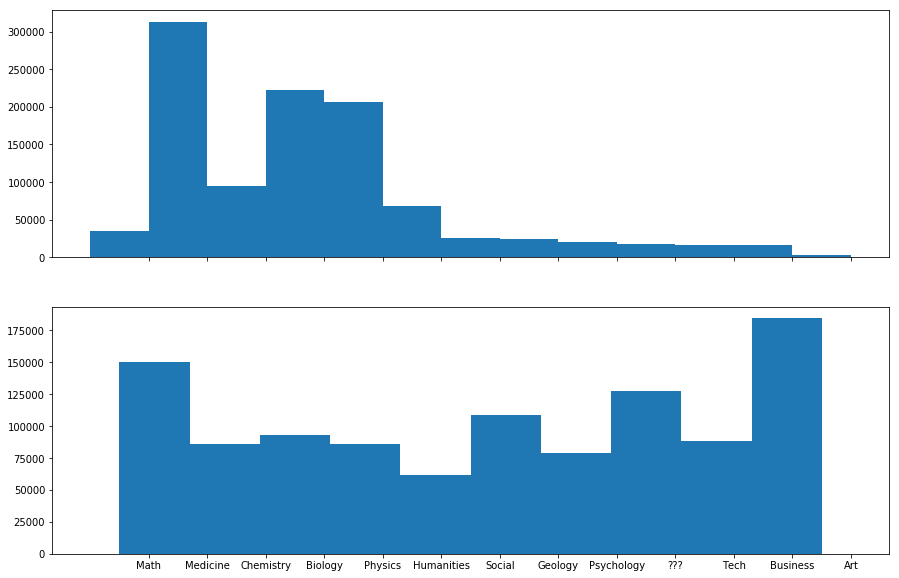

In [17]:
from collections import Counter

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 10))

l, values = zip(*Counter(labels).items())

indexes = np.arange(len(l))
width = 1

ax1.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, l)

ax2.hist(km.labels_)

plt.show()